In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# BTC

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
...,...,...,...,...,...,...,...
2347,2023-06-06,25732.109375,27313.820312,25434.867188,27238.783203,27238.783203,21929670693
2348,2023-06-07,27235.650391,27332.181641,26146.988281,26345.998047,26345.998047,19530045082
2349,2023-06-08,26347.654297,26797.513672,26246.664062,26508.216797,26508.216797,11904824295
2350,2023-06-09,26505.923828,26770.289062,26339.314453,26480.375000,26480.375000,11015551640


In [ ]:
# Chọn các cột cần thiết
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna() # Loại bỏ các giá trị bị thiếu
df = df.reset_index(drop=True) # Đặt lại chỉ số

<ipython-input-4-4e2f5a330610>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


## Tỉ lệ 7:2:1


In [ ]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số láng giềng phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

        # Dự đoán giá trị cho tập kiểm tra
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Close'])
        y_pred = model.predict(x_test)

        # Dự đoán giá trị cho 30 ngày tiếp theo
        last_index = df.index[-1]
        last_data = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
        x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
        y_next_30_days = model.predict(x_next_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 13319.01273842273
Number of neighbors: 2, RMSE: 13028.635597630708
Number of neighbors: 3, RMSE: 12691.802732340278
Number of neighbors: 4, RMSE: 12448.285089749825
Number of neighbors: 5, RMSE: 12575.71412905384
Number of neighbors: 6, RMSE: 12789.40001831786
Number of neighbors: 7, RMSE: 12750.981443813254
Number of neighbors: 8, RMSE: 12747.29858685475
Number of neighbors: 9, RMSE: 12489.325484819747
Number of neighbors: 10, RMSE: 12232.643173311179
Number of neighbors: 11, RMSE: 12278.041390296961
Number of neighbors: 12, RMSE: 12243.236289372035
Number of neighbors: 13, RMSE: 12127.011306761215
Number of neighbors: 14, RMSE: 11972.788795959552
Number of neighbors: 15, RMSE: 12087.162440150476
Number of neighbors: 16, RMSE: 12182.61261826467
Number of neighbors: 17, RMSE: 12276.290728015436
Number of neighbors: 18, RMSE: 12476.719405137103
Number of neighbors: 19, RMSE: 12670.884101304118
Number of neighbors: 20, RMSE: 12942.287323209322
Best k: 14
Bes

In [ ]:
# last_price = df['Close'].iloc[-1]
# print('Last Price:', last_price)

# # In kết quả dự đoán 30 ngày tiếp theo
# print('Predicted closing prices for the next 30 days:')
# for i, price in enumerate(y_next_30_days):
#     print(f"Day {i+1}: {price}")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán MAE và RMSE cho tập testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính toán MAPE cho tập validation và testing
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In kết quả
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)

print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)


Validation MAE: 12108.122129899366
Validation RMSE: 12942.287323209322
Validation MAPE: 59.799727122639645
Testing MAE: 11757.030563141152
Testing RMSE: 13668.145993683982
Testing MAPE: 33.858019569471516


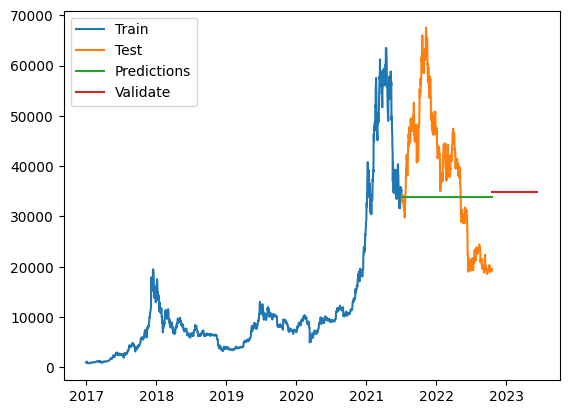

In [ ]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
# ax.plot(last_data, y_next_30_days)
ax.legend(['Train', 'Test', 'Predictions', 'Validate'])

## Tỉ lệ 5:3:2

In [ ]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
val_size1 = len(df) - train_size1 - test_size1

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

# Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [ ]:
# Tìm số láng giềng phù hợp
best_k1 = None
best_rmse1 = float('inf')

for k1 in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k1)
    model.fit(x_train1, y_train1)

    # Dự đoán giá trị cho tập xác thực
    x_val1 = np.array(val_data1.index).reshape(-1, 1)
    y_val1 = np.array(val_data1['Close'])
    y_pred_val1 = model.predict(x_val1)

    # Tính toán RMSE
    rmse1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k1}, RMSE: {rmse1}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse1 < best_rmse1:
        best_k1 = k1
        best_rmse1 = rmse1

# Xây dựng mô hình KNN với số láng giềng tốt nhất
model = KNeighborsRegressor(n_neighbors=best_k1)
model.fit(x_train1, y_train1)

# Dự đoán giá trị cho tập kiểm tra
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(x_test1)

# Dự đoán giá trị cho 30 ngày tiếp theo
last_index1 = df.index[-1]
last_data1 = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)
y_next1_30_days = model.predict(x_next1_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k1)
print('Best RMSE:', best_rmse1)

Number of neighbors: 1, RMSE: 20968.391678764958
Number of neighbors: 2, RMSE: 20962.02891110063
Number of neighbors: 3, RMSE: 20962.254577620366
Number of neighbors: 4, RMSE: 21183.60265345914
Number of neighbors: 5, RMSE: 21318.970866066953
Number of neighbors: 6, RMSE: 21442.062201483124
Number of neighbors: 7, RMSE: 21479.7578058935
Number of neighbors: 8, RMSE: 21530.39465483682
Number of neighbors: 9, RMSE: 21532.162873681045
Number of neighbors: 10, RMSE: 21588.845162161717
Number of neighbors: 11, RMSE: 21386.14031345682
Number of neighbors: 12, RMSE: 21217.57643187505
Number of neighbors: 13, RMSE: 21074.11467361416
Number of neighbors: 14, RMSE: 20939.044083758174
Number of neighbors: 15, RMSE: 20772.550850731343
Number of neighbors: 16, RMSE: 20614.751270001238
Number of neighbors: 17, RMSE: 20478.064894401214
Number of neighbors: 18, RMSE: 20373.29564526444
Number of neighbors: 19, RMSE: 20278.0526516525
Number of neighbors: 20, RMSE: 20188.62478103151
Best k: 20
Best RMSE:

In [ ]:
# # In kết quả dự đoán 30 ngày tiếp theo
# print('Predicted closing prices for the next 30 days:')
# for i1, price1 in enumerate(y_next_30_days):
#     print(f"Day {i1+1}: {price1}")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val1 = mean_absolute_error(y_val1, y_pred_val1)
rmse_val1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

# Tính toán MAE và RMSE cho tập testing
mae_test1 = mean_absolute_error(y_test1, y_pred1)
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred1))

# Tính toán MAPE cho tập validation và testing
mape_val1 = np.mean(np.abs((y_val1 - y_pred_val1) / y_val1)) * 100
mape_test1 = np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100

# In kết quả
print('Validation MAE:', mae_val1)
print('Validation RMSE:', rmse_val1)
print('Validation MAPE:', mape_val1)

print('Testing MAE:', mae_test1)
print('Testing RMSE:', rmse_test1)
print('Testing MAPE:', mape_test1)


Validation MAE: 18617.67128144282
Validation RMSE: 20188.62478103151
Validation MAPE: 70.35369623765635
Testing MAE: 25553.192789401874
Testing RMSE: 31679.834099133455
Testing MAPE: 64.24593737613058


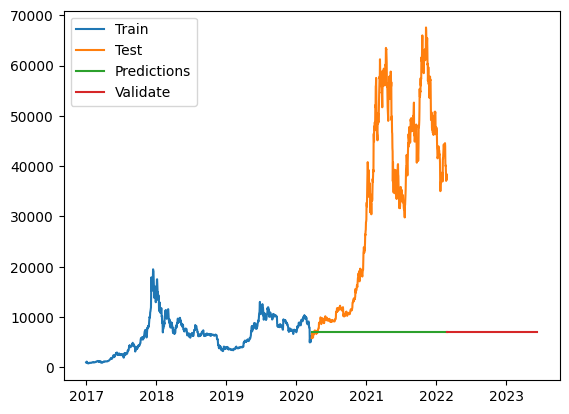

In [ ]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data1['Date'], train_data1['Close'])
ax.plot(test_data1['Date'], test_data1['Close'])
ax.plot(test_data1['Date'], y_pred1)
ax.plot(val_data1['Date'], y_pred_val1)
# ax.plot(last_data1, y_next1_30_days)
ax.legend(['Train', 'Test', 'Predictions', 'Validate'])

# DOGE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/DOGE-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
...,...,...,...,...,...,...,...
2035,2023-06-06,0.066568,0.071784,0.066112,0.070373,0.070373,428926152
2036,2023-06-07,0.070371,0.070371,0.066878,0.067300,0.067300,278793457
2037,2023-06-08,0.067302,0.068426,0.067154,0.067966,0.067966,167825308
2038,2023-06-09,0.067963,0.070920,0.067626,0.069489,0.069489,274101529


In [ ]:
# Chọn các cột cần thiết
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna() # Loại bỏ các giá trị bị thiếu
df = df.reset_index(drop=True) # Đặt lại chỉ số

<ipython-input-4-4e2f5a330610>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


## Tỉ lệ 7:2:1


In [ ]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số láng giềng phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

        # Dự đoán giá trị cho tập kiểm tra
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Close'])
        y_pred = model.predict(x_test)

        # Dự đoán giá trị cho 30 ngày tiếp theo
        last_index = df.index[-1]
        last_data = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
        x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
        y_next_30_days = model.predict(x_next_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 0.17468528582845314
Number of neighbors: 2, RMSE: 0.17312831738748746
Number of neighbors: 3, RMSE: 0.16889300384474937
Number of neighbors: 4, RMSE: 0.16200638471171125
Number of neighbors: 5, RMSE: 0.15735265480342595
Number of neighbors: 6, RMSE: 0.15489551479444721
Number of neighbors: 7, RMSE: 0.15046419734550828
Number of neighbors: 8, RMSE: 0.14647122439663693
Number of neighbors: 9, RMSE: 0.1431360717611957
Number of neighbors: 10, RMSE: 0.14081327726897835
Number of neighbors: 11, RMSE: 0.13933932929029616
Number of neighbors: 12, RMSE: 0.13841695821918945
Number of neighbors: 13, RMSE: 0.13769876642168638
Number of neighbors: 14, RMSE: 0.13817955357504694
Number of neighbors: 15, RMSE: 0.13859797131586987
Number of neighbors: 16, RMSE: 0.13747771139730008
Number of neighbors: 17, RMSE: 0.1368440612095676
Number of neighbors: 18, RMSE: 0.13772618931092803
Number of neighbors: 19, RMSE: 0.1389484919546304
Number of neighbors: 20, RMSE: 0.1399759478

In [ ]:
last_price = df['Close'].iloc[-1]
print('Last Price:', last_price)

# In kết quả dự đoán 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
for i, price in enumerate(y_next_30_days):
    print(f"Day {i+1}: {price}")

Last Price: 0.0618599988520145
Predicted closing prices for the next 30 days:
Day 1: 0.21723058819770813
Day 2: 0.21723058819770813
Day 3: 0.21723058819770813
Day 4: 0.21723058819770813
Day 5: 0.21723058819770813
Day 6: 0.21723058819770813
Day 7: 0.21723058819770813
Day 8: 0.21723058819770813
Day 9: 0.21723058819770813
Day 10: 0.21723058819770813
Day 11: 0.21723058819770813
Day 12: 0.21723058819770813
Day 13: 0.21723058819770813
Day 14: 0.21723058819770813
Day 15: 0.21723058819770813
Day 16: 0.21723058819770813
Day 17: 0.21723058819770813
Day 18: 0.21723058819770813
Day 19: 0.21723058819770813
Day 20: 0.21723058819770813
Day 21: 0.21723058819770813
Day 22: 0.21723058819770813
Day 23: 0.21723058819770813
Day 24: 0.21723058819770813
Day 25: 0.21723058819770813
Day 26: 0.21723058819770813
Day 27: 0.21723058819770813
Day 28: 0.21723058819770813
Day 29: 0.21723058819770813
Day 30: 0.21723058819770813


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán MAE và RMSE cho tập testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính toán MAPE cho tập validation và testing
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In kết quả
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)

print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)


Validation MAE: 0.13969578261249793
Validation RMSE: 0.1399759478444411
Validation MAPE: 176.31891371735756
Testing MAE: 0.1000058931919436
Testing RMSE: 0.11094737240134454
Testing MAPE: 121.18803321507289


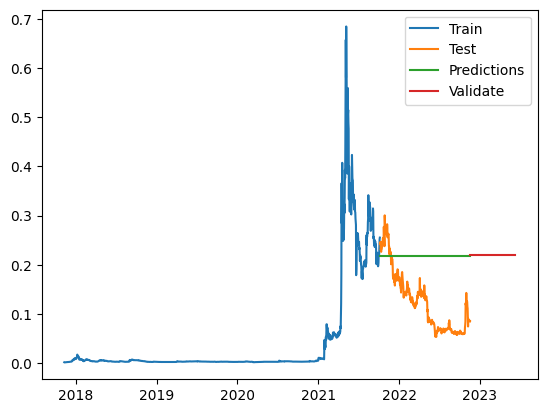

In [ ]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
# ax.plot(last_data, y_next_30_days)
ax.legend(['Train', 'Test', 'Predictions', 'Validate'])

## Tỉ lệ 5:3:2

In [ ]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
val_size1 = len(df) - train_size1 - test_size1

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

# Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [ ]:
# Tìm số láng giềng phù hợp
best_k1 = None
best_rmse1 = float('inf')

for k1 in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k1)
    model.fit(x_train1, y_train1)

    # Dự đoán giá trị cho tập xác thực
    x_val1 = np.array(val_data1.index).reshape(-1, 1)
    y_val1 = np.array(val_data1['Close'])
    y_pred_val1 = model.predict(x_val1)

    # Tính toán RMSE
    rmse1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k1}, RMSE: {rmse1}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse1 < best_rmse1:
        best_k1 = k1
        best_rmse1 = rmse1

# Xây dựng mô hình KNN với số láng giềng tốt nhất
model = KNeighborsRegressor(n_neighbors=best_k1)
model.fit(x_train1, y_train1)

# Dự đoán giá trị cho tập kiểm tra
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(x_test1)

# Dự đoán giá trị cho 30 ngày tiếp theo
last_index1 = df.index[-1]
last_data1 = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)
y_next1_30_days = model.predict(x_next1_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k1)
print('Best RMSE:', best_rmse1)

Number of neighbors: 1, RMSE: 0.07616787408491654
Number of neighbors: 2, RMSE: 0.07616983204220709
Number of neighbors: 3, RMSE: 0.07616134765237803
Number of neighbors: 4, RMSE: 0.07616909780796703
Number of neighbors: 5, RMSE: 0.07616082550235483
Number of neighbors: 6, RMSE: 0.07616102128960084
Number of neighbors: 7, RMSE: 0.07614857446741795
Number of neighbors: 8, RMSE: 0.07612981698081657
Number of neighbors: 9, RMSE: 0.07612251565707373
Number of neighbors: 10, RMSE: 0.07611520621916873
Number of neighbors: 11, RMSE: 0.07610726790311727
Number of neighbors: 12, RMSE: 0.07610424210055343
Number of neighbors: 13, RMSE: 0.07610416679874385
Number of neighbors: 14, RMSE: 0.07611039541835066
Number of neighbors: 15, RMSE: 0.07610894098926604
Number of neighbors: 16, RMSE: 0.07610987097697652
Number of neighbors: 17, RMSE: 0.07610798508551331
Number of neighbors: 18, RMSE: 0.07610505787986188
Number of neighbors: 19, RMSE: 0.07610104767838756
Number of neighbors: 20, RMSE: 0.0760997

In [ ]:
# In kết quả dự đoán 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
for i1, price1 in enumerate(y_next_30_days):
    print(f"Day {i1+1}: {price1}")

Predicted closing prices for the next 30 days:
Day 1: 0.21723058819770813
Day 2: 0.21723058819770813
Day 3: 0.21723058819770813
Day 4: 0.21723058819770813
Day 5: 0.21723058819770813
Day 6: 0.21723058819770813
Day 7: 0.21723058819770813
Day 8: 0.21723058819770813
Day 9: 0.21723058819770813
Day 10: 0.21723058819770813
Day 11: 0.21723058819770813
Day 12: 0.21723058819770813
Day 13: 0.21723058819770813
Day 14: 0.21723058819770813
Day 15: 0.21723058819770813
Day 16: 0.21723058819770813
Day 17: 0.21723058819770813
Day 18: 0.21723058819770813
Day 19: 0.21723058819770813
Day 20: 0.21723058819770813
Day 21: 0.21723058819770813
Day 22: 0.21723058819770813
Day 23: 0.21723058819770813
Day 24: 0.21723058819770813
Day 25: 0.21723058819770813
Day 26: 0.21723058819770813
Day 27: 0.21723058819770813
Day 28: 0.21723058819770813
Day 29: 0.21723058819770813
Day 30: 0.21723058819770813


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val1 = mean_absolute_error(y_val1, y_pred_val1)
rmse_val1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

# Tính toán MAE và RMSE cho tập testing
mae_test1 = mean_absolute_error(y_test1, y_pred1)
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred1))

# Tính toán MAPE cho tập validation và testing
mape_val1 = np.mean(np.abs((y_val1 - y_pred_val1) / y_val1)) * 100
mape_test1 = np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100

# In kết quả
print('Validation MAE:', mae_val1)
print('Validation RMSE:', rmse_val1)
print('Validation MAPE:', mape_val1)

print('Testing MAE:', mae_test1)
print('Testing RMSE:', rmse_test1)
print('Testing MAPE:', mape_test1)


Validation MAE: 0.07449651273291594
Validation RMSE: 0.07609973900105764
Validation MAPE: 95.37583271614038
Testing MAE: 0.14675905986896753
Testing RMSE: 0.1934213399768703
Testing MAPE: 79.96326785626519


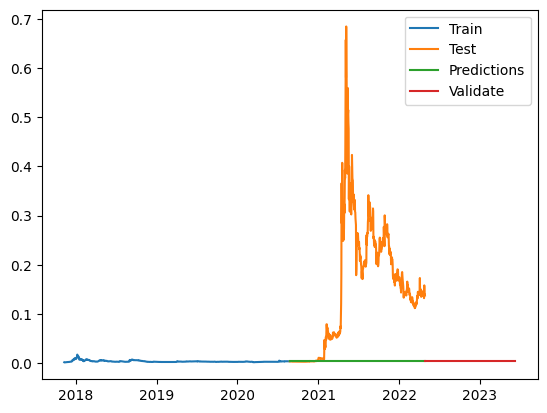

In [ ]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data1['Date'], train_data1['Close'])
ax.plot(test_data1['Date'], test_data1['Close'])
ax.plot(test_data1['Date'], y_pred1)
ax.plot(val_data1['Date'], y_pred_val1)
# ax.plot(last_data1, y_next1_30_days)
ax.legend(['Train', 'Test', 'Predictions', 'Validate'])

# ETH


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
# Dùng thư viện yfinance để tải dataset
import yfinance as yf

start_date = '2017-01-01'
end_date = '2023-06-11'
symbol = 'ETH-USD'

data = yf.download(symbol, start=start_date, end=end_date)
data.to_csv('ETH-USD.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/ETH-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
2035,2023-06-06,1810.581421,1896.222656,1801.405273,1884.494873,1884.494873,8704411776
2036,2023-06-07,1884.372925,1893.809082,1822.303101,1832.395996,1832.395996,7919894455
2037,2023-06-08,1832.513550,1861.136108,1830.165039,1846.301880,1846.301880,4536041931
2038,2023-06-09,1846.077881,1854.824951,1828.544556,1840.225220,1840.225220,4610831509


In [ ]:
# Chọn các cột cần thiết
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna() # Loại bỏ các giá trị bị thiếu
df = df.reset_index(drop=True) # Đặt lại chỉ số

<ipython-input-4-4e2f5a330610>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


## Tỉ lệ 7:2:1


In [ ]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số láng giềng phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

        # Dự đoán giá trị cho tập kiểm tra
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Close'])
        y_pred = model.predict(x_test)

        # Dự đoán giá trị cho 30 ngày tiếp theo
        last_index = df.index[-1]
        last_data = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
        x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
        y_next_30_days = model.predict(x_next_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 1986.2819826757718
Number of neighbors: 2, RMSE: 1955.5351141726446
Number of neighbors: 3, RMSE: 1899.5748017367712
Number of neighbors: 4, RMSE: 1881.0802534226398
Number of neighbors: 5, RMSE: 1864.7050402828818
Number of neighbors: 6, RMSE: 1839.90177837114
Number of neighbors: 7, RMSE: 1778.9626223656874
Number of neighbors: 8, RMSE: 1714.936629489146
Number of neighbors: 9, RMSE: 1660.1472005830362
Number of neighbors: 10, RMSE: 1628.8667071436416
Number of neighbors: 11, RMSE: 1614.778054190183
Number of neighbors: 12, RMSE: 1591.8023983502744
Number of neighbors: 13, RMSE: 1572.8315918475873
Number of neighbors: 14, RMSE: 1572.3402529623572
Number of neighbors: 15, RMSE: 1566.8099079902179
Number of neighbors: 16, RMSE: 1542.66208119694
Number of neighbors: 17, RMSE: 1532.6398727233397
Number of neighbors: 18, RMSE: 1544.0117626499432
Number of neighbors: 19, RMSE: 1559.510292011154
Number of neighbors: 20, RMSE: 1571.8121708532888
Best k: 17
Best 

In [ ]:
last_price = df['Close'].iloc[-1]
print('Last Price:', last_price)

# In kết quả dự đoán 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
for i, price in enumerate(y_next_30_days):
    print(f"Day {i+1}: {price}")

Last Price: 1752.384765625
Predicted closing prices for the next 30 days:
Day 1: 3121.724293428309
Day 2: 3121.724293428309
Day 3: 3121.724293428309
Day 4: 3121.724293428309
Day 5: 3121.724293428309
Day 6: 3121.724293428309
Day 7: 3121.724293428309
Day 8: 3121.724293428309
Day 9: 3121.724293428309
Day 10: 3121.724293428309
Day 11: 3121.724293428309
Day 12: 3121.724293428309
Day 13: 3121.724293428309
Day 14: 3121.724293428309
Day 15: 3121.724293428309
Day 16: 3121.724293428309
Day 17: 3121.724293428309
Day 18: 3121.724293428309
Day 19: 3121.724293428309
Day 20: 3121.724293428309
Day 21: 3121.724293428309
Day 22: 3121.724293428309
Day 23: 3121.724293428309
Day 24: 3121.724293428309
Day 25: 3121.724293428309
Day 26: 3121.724293428309
Day 27: 3121.724293428309
Day 28: 3121.724293428309
Day 29: 3121.724293428309
Day 30: 3121.724293428309


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán MAE và RMSE cho tập testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính toán MAPE cho tập validation và testing
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In kết quả
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)

print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)


Validation MAE: 1549.8605806238513
Validation RMSE: 1571.8121708532888
Validation MAPE: 101.95432629463835
Testing MAE: 1070.3199280999524
Testing RMSE: 1244.846472348456
Testing MAPE: 62.33927435452846


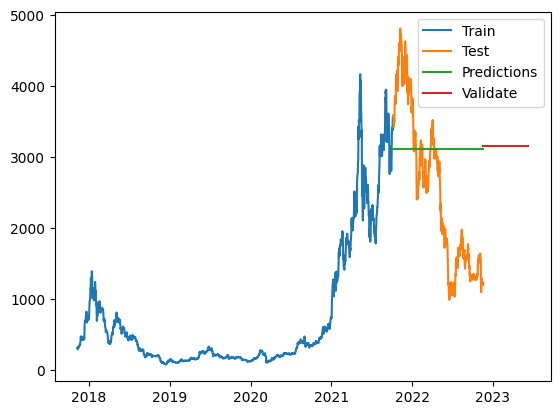

In [ ]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
# ax.plot(last_data, y_next_30_days)
ax.legend(['Train', 'Test', 'Predictions', 'Validate'])

## Tỉ lệ 5:3:2

In [ ]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
val_size1 = len(df) - train_size1 - test_size1

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

# Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [ ]:
# Tìm số láng giềng phù hợp
best_k1 = None
best_rmse1 = float('inf')

for k1 in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k1)
    model.fit(x_train1, y_train1)

    # Dự đoán giá trị cho tập xác thực
    x_val1 = np.array(val_data1.index).reshape(-1, 1)
    y_val1 = np.array(val_data1['Close'])
    y_pred_val1 = model.predict(x_val1)

    # Tính toán RMSE
    rmse1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k1}, RMSE: {rmse1}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse1 < best_rmse1:
        best_k1 = k1
        best_rmse1 = rmse1

# Xây dựng mô hình KNN với số láng giềng tốt nhất
model = KNeighborsRegressor(n_neighbors=best_k1)
model.fit(x_train1, y_train1)

# Dự đoán giá trị cho tập kiểm tra
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(x_test1)

# Dự đoán giá trị cho 30 ngày tiếp theo
last_index1 = df.index[-1]
last_data1 = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)
y_next1_30_days = model.predict(x_next1_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k1)
print('Best RMSE:', best_rmse1)

Number of neighbors: 1, RMSE: 1230.4457941142668
Number of neighbors: 2, RMSE: 1238.5182785869813
Number of neighbors: 3, RMSE: 1239.780340032858
Number of neighbors: 4, RMSE: 1242.027768741803
Number of neighbors: 5, RMSE: 1238.1119976625125
Number of neighbors: 6, RMSE: 1237.1038802708126
Number of neighbors: 7, RMSE: 1234.0159493386977
Number of neighbors: 8, RMSE: 1230.9946681859608
Number of neighbors: 9, RMSE: 1228.1898812691218
Number of neighbors: 10, RMSE: 1225.9879775798986
Number of neighbors: 11, RMSE: 1223.8328315578626
Number of neighbors: 12, RMSE: 1222.7314476376762
Number of neighbors: 13, RMSE: 1224.5924942636514
Number of neighbors: 14, RMSE: 1226.919617670055
Number of neighbors: 15, RMSE: 1227.9414627836466
Number of neighbors: 16, RMSE: 1229.1225487613515
Number of neighbors: 17, RMSE: 1230.002346132876
Number of neighbors: 18, RMSE: 1231.5589125665115
Number of neighbors: 19, RMSE: 1232.1685685483385
Number of neighbors: 20, RMSE: 1232.3980427278984
Best k: 12
Be

In [ ]:
# In kết quả dự đoán 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
for i1, price1 in enumerate(y_next1_30_days):
    print(f"Day {i1+1}: {price1}")


Predicted closing prices for the next 30 days:
Day 1: 3121.724293428309
Day 2: 3121.724293428309
Day 3: 3121.724293428309
Day 4: 3121.724293428309
Day 5: 3121.724293428309
Day 6: 3121.724293428309
Day 7: 3121.724293428309
Day 8: 3121.724293428309
Day 9: 3121.724293428309
Day 10: 3121.724293428309
Day 11: 3121.724293428309
Day 12: 3121.724293428309
Day 13: 3121.724293428309
Day 14: 3121.724293428309
Day 15: 3121.724293428309
Day 16: 3121.724293428309
Day 17: 3121.724293428309
Day 18: 3121.724293428309
Day 19: 3121.724293428309
Day 20: 3121.724293428309
Day 21: 3121.724293428309
Day 22: 3121.724293428309
Day 23: 3121.724293428309
Day 24: 3121.724293428309
Day 25: 3121.724293428309
Day 26: 3121.724293428309
Day 27: 3121.724293428309
Day 28: 3121.724293428309
Day 29: 3121.724293428309
Day 30: 3121.724293428309


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val1 = mean_absolute_error(y_val1, y_pred_val1)
rmse_val1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

# Tính toán MAE và RMSE cho tập testing
mae_test1 = mean_absolute_error(y_test1, y_pred1)
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred1))

# Tính toán MAPE cho tập validation và testing
mape_val1 = np.mean(np.abs((y_val1 - y_pred_val1) / y_val1)) * 100
mape_test1 = np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100

# In kết quả
print('Validation MAE:', mae_val1)
print('Validation RMSE:', rmse_val1)
print('Validation MAPE:', mape_val1)

print('Testing MAE:', mae_test1)
print('Testing RMSE:', rmse_test1)
print('Testing MAPE:', mape_test1)


Validation MAE: 1187.0390422147866
Validation RMSE: 1232.3980427278984
Validation MAPE: 73.45219630345375
Testing MAE: 1922.0987227446115
Testing RMSE: 2289.1867088401473
Testing MAPE: 69.44907650024723


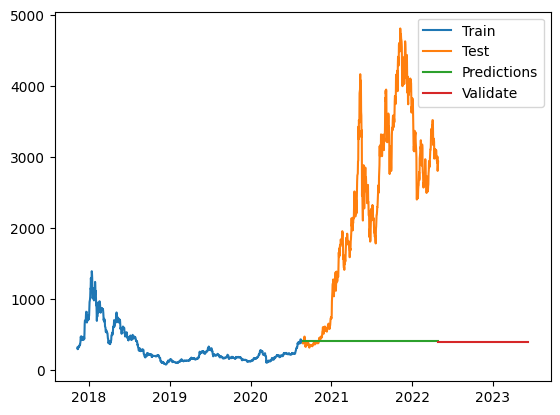

In [ ]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data1['Date'], train_data1['Close'])
ax.plot(test_data1['Date'], test_data1['Close'])
ax.plot(test_data1['Date'], y_pred1)
ax.plot(val_data1['Date'], y_pred_val1)
# ax.plot(last_data1, y_next1_30_days)
ax.legend(['Train', 'Test', 'Predictions', 'Validate', 'Validate_Pred'])